# Atividade Prática 2.1 - Cobertura Florestal

* Disciplina _Inteligência Artificial Aplicada_
* Professora: Elloá B. Guedes (ebgcosta@uea.edu.br)
* Data de apresentação: 26 de janeiro de 2024
* Data limite de entrega: 01 de fevereiro de 2024


## Equipe
* Integrante 1: *Aurelio Aquino*
* Integrante 2: *Jailson Bina*
* Integrante 3: *Sthephany Costa*
* Integrante 4: *Erica Veras*
* Integrante 5: *Michelle de Carvalho*
* Integrante 6: *Fabiano Dolzanes*


## Contexto: Cobertura Florestal

Este conjunto de dados contém observações de árvores de quatro áreas da Floresta Nacional de Roosevelt, no Colorado. Todas as observações são variáveis cartográficas (sem sensoriamento remoto) de seções de floresta de 30 metros por 30 metros. Há mais de meio milhão de medições no total

## Base de Dados

Disponível em: https://www.kaggle.com/datasets/uciml/forest-cover-type-dataset

### Bibliotecas

Por hábito, a primeira célula do notebook costuma ser reservada para importação de bibliotecas.
A cada biblioteca nova acrescida, é necessário executar a célula para atualização e correta execução

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score

/tmp/ipykernel_1715/4098474455.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Abertura do Dataset

Abra o dataset e visualize o seu cabeçalho, isto é, os primeiros exemplos nele contidos.
Isto é útil para checar se a importação foi realizada de maneira adequada e se a disposição dos dados está de acordo para os próximos passos do trabalho.

In [2]:
df = pd.read_csv('covtype2 - covtype2.csv')

### Análise Exploratória

1. Quantos exemplos há no dataset?
2. Quais os atributos existentes no dataset?
3. O atributo alvo é Cover_Type. A distribuição de classes no mesmo é uniforme?

In [3]:
len(df)

10000

In [4]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [5]:
df['Cover_Type'].value_counts()

Cover_Type
4    1620
5    1583
2    1462
1    1375
7    1349
6    1349
3    1262
Name: count, dtype: int64

### Organização dos dados para treinamento

1. Remova os dados faltantes
2. Remova a coluna Cover_Type e atribua-a a uma variável Y
3. Atribua os demais valores do dataset a uma variável X
4. Efetue uma partição holdout 70/30 com o sklearn

In [6]:
df = df.dropna()

In [7]:
X = df.drop(columns=['Cover_Type'])

In [8]:
Y = df['Cover_Type']

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

### Treinamento de uma RNA MLP para o problema

1. Treine uma RNA MLP Classificadora para este problema com uma única camada e 10 neurônios  
    1.1 Utilize a função de ativação ReLU  
    1.2 Utilize o solver Adam    
    1.3 Imprima o passo a passo do treinamento    
    1.4 Utilize o número máximo de épocas igual a 100 

In [10]:
modelo = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', verbose=True, max_iter=100)

In [11]:
modelo.fit(X_train, Y_train)

Iteration 1, loss = 29.99563496
Iteration 2, loss = 27.23715818
Iteration 3, loss = 23.98883241
Iteration 4, loss = 20.50807044
Iteration 5, loss = 15.86483373
Iteration 6, loss = 11.48119762
Iteration 7, loss = 8.53254068
Iteration 8, loss = 6.70528452
Iteration 9, loss = 5.54285213
Iteration 10, loss = 4.70090693
Iteration 11, loss = 4.00814988
Iteration 12, loss = 3.55119602
Iteration 13, loss = 3.21943922
Iteration 14, loss = 2.99657981
Iteration 15, loss = 2.84250080
Iteration 16, loss = 2.68691911
Iteration 17, loss = 2.57005794
Iteration 18, loss = 2.47273174
Iteration 19, loss = 2.38171008
Iteration 20, loss = 2.29912061
Iteration 21, loss = 2.22551324
Iteration 22, loss = 2.17882527
Iteration 23, loss = 2.12554022
Iteration 24, loss = 2.08390411
Iteration 25, loss = 2.06564854
Iteration 26, loss = 2.03743207
Iteration 27, loss = 2.02046147
Iteration 28, loss = 1.99670372
Iteration 29, loss = 2.00654562
Iteration 30, loss = 1.96554315
Iteration 31, loss = 1.93740030
Iteration 3

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10,), max_iter=100, verbose=True)

## Aferição de Desempenho

2. Com o modelo em questão, após o treinamento, apresente:  
    2.1 Matriz de confusão para o conjunto de teste  
    2.2 Acurácia  
    2.3 F-Score Balanceado  
    2.4 Precisão  
    2.5 Revocação 

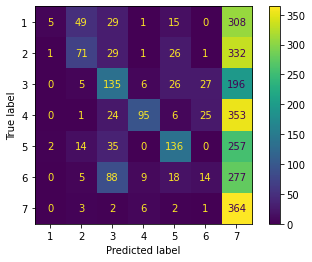

In [12]:
Y_prev = modelo.predict(X_test)
ConfusionMatrixDisplay.from_predictions(Y_test, Y_prev)

In [13]:
accuracy_score(Y_test, Y_prev)

0.2733333333333333

In [14]:
f1_score(Y_test, Y_prev, average='macro')

0.24100458527879803

In [15]:
precision_score(Y_test, Y_prev, average='macro')

0.4683904523546842

In [16]:
recall_score(Y_test, Y_prev, average='macro')

0.2856992532100134

## Busca em Grade

Uma maneira padrão de escolher os parâmetros de um modelo de Machine Learning é por meio de uma busca em grade via força bruta. O algoritmo da busca em grade é dado como segue:

1. Escolha a métrica de desempenho que você deseja maximizar  
2. Escolha o algoritmo de Machine Learning (exemplo: redes neurais artificiais). Em seguida, defina os parâmetros ou hiperparâmetros deste tipo de modelo sobre os quais você dseja otimizar (número de épocas, taxa de aprendizado, etc.) e construa um array de valores a serem testados para cada parâmetro ou hiperparâmetro.  
3. Defina a grade de busca, a qual é dada como o produto cartesiano de cada parâmetro a ser testado. Por exemplo, para os arrays [50, 75, 100] e [10, 15], tem-se que a grade é [(50,10), (50,15), (75,10), (75,15), (100,10), (100,15)].
4. Para cada combinação de parâmetros a serem otimizados, utilize o conjunto de treinamento para realizar uma validação cruzada (holdout ou k-fold) e calcule a métrica de avaliação no conjunto de teste (ou conjuntos de teste)
5. Escolha a combinação de parâmetros que maximizam a métrica de avaliação. Este é o modelo otimizado.

Por que esta abordagem funciona? Porque a busca em grade efetua uma pesquisa extensiva sobre as possíveis combinações de valores para cada um dos parâmetros a serem ajustados. Para cada combinação, ela estima a performance do modelo em dados novos. Por fim, o modelo com melhor métrica de desempenho é escolhido. Tem-se então que este modelo é o que melhor pode vir a generalizar mediante dados nunca antes vistos.

Nesta busca em grande, contemple a utilização do objeto [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [17]:
neuron1 = [50, 75, 100]
neuron2 = [10, 15]

neurons = []
for i in neuron1:
  for j in neuron2:
    neurons.append((i,j))

neurons

[(50, 10), (50, 15), (75, 10), (75, 15), (100, 10), (100, 15)]

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
parameters = {
    'hidden_layer_sizes': neurons,
    'activation': ['identity', 'logistic', 'tahn', 'relu'],
    'solver': ['adam', 'lbfgs', 'sqd']
}
# Utilizando k-fold padrão de 5 e aumentando número de tentativas para 20
# Total de 360 fits
searcher = GridSearchCV(MLPClassifier(verbose=True, n_iter_no_change=20), parameters, verbose=True)

In [20]:
searcher.fit(X_train, Y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Iteration 1, loss = 29.82660573
Iteration 2, loss = 23.56330573
Iteration 3, loss = 18.87206339
Iteration 4, loss = 15.77584573
Iteration 5, loss = 13.12586192
Iteration 6, loss = 10.29769050
Iteration 7, loss = 9.59890695
Iteration 8, loss = 8.06563255
Iteration 9, loss = 11.47608931
Iteration 10, loss = 8.68926544
Iteration 11, loss = 7.22164819
Iteration 12, loss = 5.52673437
Iteration 13, loss = 5.21278397
Iteration 14, loss = 5.11574765
Iteration 15, loss = 6.97524538
Iteration 16, loss = 7.78113300
Iteration 17, loss = 8.45082457
Iteration 18, loss = 6.01226717
Iteration 19, loss = 3.97387846
Iteration 20, loss = 3.64898553
Iteration 21, loss = 3.85839326
Iteration 22, loss = 6.61824450
Iteration 23, loss = 6.87395113
Iteration 24, loss = 5.99385020
Iteration 25, loss = 3.69912436
Iteration 26, loss = 5.30908349
Iteration 27, loss = 3.91492827
Iteration 28, loss = 3.98221251
Iteration 29, loss = 4.33281968
Iteration 30

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 3337      4     56      2     0     0   8.352D+02   2.863D+01
  F =   28.626944395930977     

ABNORMAL_TERMINATION_IN_LNSRCH                              

 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         3337     M =           10
 This problem is unconstrained.

At X0         0 variables are exac

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 3337      1     21      1     0     0   6.147D+02   3.089D+01
  F =   30.894750352075647     

ABNORMAL_TERMINATION_IN_LNSRCH                              

 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         3337     M =           10
 This problem is unconstrained.

At X0         0 variables are exac

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 3337      1     21      1     0     0   1.140D+03   3.158D+01
  F =   31.576815618198903     

ABNORMAL_TERMINATION_IN_LNSRCH                              

 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         3337     M =           10
 This problem is unconstrained.

At X0         0 variables are exac

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 3337      1     21      1     0     0   6.779D+02   3.164D+01
  F =   31.636075953079001     

ABNORMAL_TERMINATION_IN_LNSRCH                              

 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         3337     M =           10
 This problem is unconstrained.

At X0         0 variables are exac

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 3337      3     47      2     0     0   9.660D+02   2.884D+01
  F =   28.842585055201539     

ABNORMAL_TERMINATION_IN_LNSRCH                              

 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
Iteration 1, loss = 29.61166400
Iteration 2, loss = 24.05368300
Iteration 3, loss = 19.29321206
Iteration 4, loss = 16.82224432
Iteration 5, loss = 13.48489308
Iteration 6, loss = 1

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 3627      7     59      2     0     0   5.996D+02   2.543D+01
  F =   25.429819107428500     

ABNORMAL_TERMINATION_IN_LNSRCH                              

 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         3627     M =           10
 This problem is unconstrained.

At X0         0 variables are exac

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 3627      4     50      2     0     0   2.590D+02   2.761D+01
  F =   27.613992329998240     

ABNORMAL_TERMINATION_IN_LNSRCH                              

 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         3627     M =           10
 This problem is unconstrained.

At X0         0 variables are exac

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 3627      4     47      2     0     0   2.570D+02   2.712D+01
  F =   27.123951822597192     

ABNORMAL_TERMINATION_IN_LNSRCH                              

 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         3627     M =           10
 This problem is unconstrained.

At X0         0 variables are exac

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 3627      3     50      2     0     0   7.604D+02   2.861D+01
  F =   28.610004214381128     

ABNORMAL_TERMINATION_IN_LNSRCH                              

 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         3627     M =           10
 This problem is unconstrained.

At X0         0 variables are exac

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 3627      2     46      2     0     0   4.768D+02   2.926D+01
  F =   29.258756185315338     

ABNORMAL_TERMINATION_IN_LNSRCH                              

 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
Iteration 1, loss = 30.67105875
Iteration 2, loss = 26.37948839
Iteration 3, loss = 20.86774083
Iteration 4, loss = 16.23392146
Iteration 5, loss = 11.65674047
Iteration 6, loss = 1

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 4962      1     21      1     0     0   1.544D+03   3.105D+01
  F =   31.049033634882125     

ABNORMAL_TERMINATION_IN_LNSRCH                              

 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         4962     M =           10
 This problem is unconstrained.

At X0         0 variables are exac

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 4962      2     45      2     0     0   6.327D+02   3.006D+01
  F =   30.064926903504194     

ABNORMAL_TERMINATION_IN_LNSRCH                              

 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         4962     M =           10
 This problem is unconstrained.

At X0         0 variables are exac

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 4962      3     49      2     0     0   1.079D+03   2.975D+01
  F =   29.751406584663791     

ABNORMAL_TERMINATION_IN_LNSRCH                              

 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         4962     M =           10
 This problem is unconstrained.

At X0         0 variables are exac

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 4962      3     51      2     0     0   6.532D+02   2.785D+01
  F =   27.845936555510619     

ABNORMAL_TERMINATION_IN_LNSRCH                              

 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         4962     M =           10
 This problem is unconstrained.

At X0         0 variables are exac

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Iteration 3, loss = 22.74764586
Iteration 4, loss = 18.31293257
Iteration 5, loss = 14.19519176
Iteration 6, loss = 12.74682420
Iteration 7, loss = 10.80816327
Iteration 8, loss = 8.50718572
Iteration 9, loss = 7.46287558
Iteration 10, loss = 9.06580614
Iteration 11, loss = 7.78083524
Iteration 12, loss = 6.41685056
Iteration 13, loss = 6.15716344
Iteration 14, loss = 7.54896129
Iteration 15, loss = 7.98841978
Iteration 16, loss = 7.74472586
Iteration 17, loss = 7.64497545
Iteration 18, loss = 6.01848220
Iteration 19, loss = 6.26883264
Iteration 20, loss = 5.39460580
Iteration 21, loss = 6.47781336
Iteration 22, loss = 5.07310878
Iteration 23, loss = 4.77406266
Iteration 24, loss = 7.94346188
Iteration 25, loss = 4.86437769
Iteration 26, loss = 5.42073914
Iteration 27, loss = 5.26753252
Iteration 28, loss = 4.32520287
Iteration 29, loss = 4.70200903
Iteration 30, loss = 4.14393348
Iteration 31, loss = 3.28394639
Iteration 32, loss = 4.08644553
Iteration 33, loss = 4.76079675
Iteration 

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 5377      8    142      4     0     0   2.735D+02   2.672D+01
  F =   26.717889905788056     

ABNORMAL_TERMINATION_IN_LNSRCH                              

 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         5377     M =           10
 This problem is unconstrained.

At X0         0 variables are exac

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 5377      2     46      2     0     0   8.905D+02   3.067D+01
  F =   30.665516596408050     

ABNORMAL_TERMINATION_IN_LNSRCH                              

 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         5377     M =           10
 This problem is unconstrained.

At X0         0 variables are exac

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 5377      4     83      3     0     0   3.745D+02   2.771D+01
  F =   27.707061104225495     

ABNORMAL_TERMINATION_IN_LNSRCH                              

 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         5377     M =           10
 This problem is unconstrained.

At X0         0 variables are exac

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 5377      1     21      1     0     0   6.287D+02   2.875D+01
  F =   28.745519139914137     

ABNORMAL_TERMINATION_IN_LNSRCH                              

 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         5377     M =           10
 This problem is unconstrained.

At X0         0 variables are exac

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 5377      2     45      2     0     0   7.319D+02   2.866D+01
  F =   28.663427320860372     

ABNORMAL_TERMINATION_IN_LNSRCH                              

 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
Iteration 1, loss = 28.73393006
Iteration 2, loss = 20.41753887
Iteration 3, loss = 14.45065701
Iteration 4, loss = 13.83640989
Iteration 5, loss = 11.89515973
Iteration 6, loss = 1

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 6587      2     43      2     0     0   9.751D+02   2.935D+01
  F =   29.353986962275552     

ABNORMAL_TERMINATION_IN_LNSRCH                              

 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         65

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 6587      1     21      1     0     0   1.152D+03   3.135D+01
  F =   31.349918529622489     

ABNORMAL_TERMINATION_IN_LNSRCH                              

 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         6587     M =           10
 This problem is unconstrained.

At X0         0 variables are exac

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 6587      4     49      2     0     0   6.068D+02   2.824D+01
  F =   28.244933161085953     

ABNORMAL_TERMINATION_IN_LNSRCH                              

 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         6587     M =           10
 This problem is unconstrained.

At X0         0 variables are exac

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Iteration 1, loss = 26.38108978
Iteration 2, loss = 18.57700325
Iteration 3, loss = 12.86518975
Iteration 4, loss = 9.40238603
Iteration 5, loss = 10.29150861
Iteration 6, loss = 8.90410397
Iteration 7, loss = 9.33168117
Iteration 8, loss = 9.22510793
Iteration 9, loss = 8.31683000
Iteration 10, loss = 7.87993647
Iteration 11, loss = 7.05799820
Iteration 12, loss = 7.54206955
Iteration 13, loss = 7.41902738
Iteration 14, loss = 7.35975802
Iteration 15, loss = 8.88050678
Iteration 16, loss = 7.20110852
Iteration 17, loss = 7.27749104
Iteration 18, loss = 6.37680704
Iteration 19, loss = 5.43546558
Iteration 20, loss = 9.10201062
Iteration 21, loss = 6.61126427
Iteration 22, loss = 7.73214924
Iteration 23, loss = 6.57073874
Iteration 24, loss = 5.29107199
Iteration 25, loss = 5.25422796
Iteration 26, loss = 5.68514332
Iteration 27, loss = 5.91490312
Iteration 28, loss = 6.30193483
Iteration 29, loss = 9.23653771
Iteration 30, loss = 7.94230427
Iteration 31, loss = 4.62422313
Iteration 32,

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 7127      5    126      4     0     0   5.300D+02   2.830D+01
  F =   28.301901360177876     

ABNORMAL_TERMINATION_IN_LNSRCH                              

 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         7127     M =           10
 This problem is unconstrained.

At X0         0 variables are exac

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         7127     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.19047D+01    |proj g|=  1.15586D+03


/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 7127      1     21      1     0     0   1.156D+03   3.190D+01
  F =   31.904698599407585     

ABNORMAL_TERMINATION_IN_LNSRCH                              

 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         7127     M =           10
 This problem is unconstrained.

At X0         0 variables are exac

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         7127     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.23044D+01    |proj g|=  8.78873D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 7127      1     21      1     0     0   8.789D+02   3.230D+01
  F =   32.304395471262353     

ABNORMAL_TERMINATION_IN_LNSRCH                              

 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function o

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 1.91065686
Iteration 5, loss = 1.89216294
Iteration 6, loss = 1.86927768
Iteration 7, loss = 1.84043411
Iteration 8, loss = 1.80847774
Iteration 9, loss = 1.77939343
Iteration 10, loss = 1.75405740
Iteration 11, loss = 1.73023831
Iteration 12, loss = 1.70476359
Iteration 13, loss = 1.67443637
Iteration 14, loss = 1.64018062
Iteration 15, loss = 1.61028915
Iteration 16, loss = 1.57307921
Iteration 17, loss = 1.53712691
Iteration 18, loss = 1.50637621
Iteration 19, loss = 1.47297241
Iteration 20, loss = 1.44983136
Iteration 21, loss = 1.42287155
Iteration 22, loss = 1.40028700
Iteration 23, loss = 1.37838199
Iteration 24, loss = 1.35746974
Iteration 25, loss = 1.33796747
Iteration 26, loss = 1.33223779
Iteration 27, loss = 1.30256916
Iteration 28, loss = 1.29060847
Iteration 29, loss = 1.27496225
Iteration 30, loss = 1.26049660
Iteration 31, loss = 1.25954701
Iteration 32, loss = 1.24266014
Iteration 33, loss = 1.22611504
Iteration 34, loss = 1.21329942
Iteration 35, 

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.97372624
Iteration 2, loss = 1.92927742
Iteration 3, loss = 1.91102973
Iteration 4, loss = 1.89408803
Iteration 5, loss = 1.87535579
Iteration 6, loss = 1.85056389
Iteration 7, loss = 1.82062174
Iteration 8, loss = 1.79180855
Iteration 9, loss = 1.76630491
Iteration 10, loss = 1.74041326
Iteration 11, loss = 1.71700982
Iteration 12, loss = 1.68688565
Iteration 13, loss = 1.66056387
Iteration 14, loss = 1.62835597
Iteration 15, loss = 1.59660048
Iteration 16, loss = 1.56844046
Iteration 17, loss = 1.54280660
Iteration 18, loss = 1.51948366
Iteration 19, loss = 1.49199514
Iteration 20, loss = 1.46737973
Iteration 21, loss = 1.44576798
Iteration 22, loss = 1.42703130
Iteration 23, loss = 1.40441701
Iteration 24, loss = 1.38998286
Iteration 25, loss = 1.37779559
Iteration 26, loss = 1.36479846
Iteration 27, loss = 1.35213158
Iteration 28, loss = 1.33788414
Iteration 29, loss = 1.32567100
Iteration 30, loss = 1.31539547
Iteration 31, loss = 1.30437911
Iteration 32, los

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         3337     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.95059D+00    |proj g|=  4.25023D-02

At iterate    1    f=  1.93808D+00    |proj g|=  3.54675D-02

At iterate    2    f=  1.93547D+00    |proj g|=  5.23609D-02

At iterate    3    f=  1.93458D+00    |proj g|=  3.68941D-02

At iterate    4    f=  1.93269D+00    |proj g|=  4.64659D-02

At iterate    5    f=  1.93042D+00    |proj g|=  3.05541D-02

At iterate    6    f=  1.92773D+00    |proj g|=  3.55122D-02

At iterate    7    f=  1.91761D+00    |proj g|=  2.37788D-02

At iterate    8    f=  1.90308D+00    |proj g|=  3.18455D-01

At iterate    9    f=  1.87164D+00    |proj g|=  1.71538D-01

At iterate   10    f=  1.84962D+00    |proj g|=  9.84798D-02

At iterate   11    f=  1.82715D+00    |proj g|=  1.41866D-01

At iterate   12    f=  1.78622D+00    |proj g|=  1.60407

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



At iterate   10    f=  1.91895D+00    |proj g|=  6.89878D-02

At iterate   11    f=  1.86030D+00    |proj g|=  5.50929D-01

At iterate   12    f=  1.82325D+00    |proj g|=  1.61950D-01

At iterate   13    f=  1.80655D+00    |proj g|=  5.17194D-01

At iterate   14    f=  1.79944D+00    |proj g|=  3.74783D-01

At iterate   15    f=  1.79226D+00    |proj g|=  2.97454D-01

At iterate   16    f=  1.78674D+00    |proj g|=  2.60146D-01

At iterate   17    f=  1.78672D+00    |proj g|=  2.23825D-01

At iterate   18    f=  1.78491D+00    |proj g|=  1.35137D-01

At iterate   19    f=  1.78191D+00    |proj g|=  1.08788D-01

At iterate   20    f=  1.78047D+00    |proj g|=  1.16702D-01

At iterate   21    f=  1.77564D+00    |proj g|=  1.09382D-01

At iterate   22    f=  1.76767D+00    |proj g|=  9.82140D-01

At iterate   23    f=  1.76584D+00    |proj g|=  1.03389D+00

At iterate   24    f=  1.76304D+00    |proj g|=  8.16329D-01

At iterate   25    f=  1.76109D+00    |proj g|=  2.04443D-01

At iter

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



At iterate   12    f=  1.90303D+00    |proj g|=  1.23546D-01

At iterate   13    f=  1.86841D+00    |proj g|=  9.01435D-02

At iterate   14    f=  1.84454D+00    |proj g|=  1.04499D-01

At iterate   15    f=  1.82999D+00    |proj g|=  6.90939D-02

At iterate   16    f=  1.81045D+00    |proj g|=  1.86389D-01

At iterate   17    f=  1.79835D+00    |proj g|=  6.22757D-02

At iterate   18    f=  1.77949D+00    |proj g|=  4.15481D-02

At iterate   19    f=  1.76580D+00    |proj g|=  7.84114D-02

At iterate   20    f=  1.75805D+00    |proj g|=  3.07100D-01

At iterate   21    f=  1.75349D+00    |proj g|=  6.90368D-02

At iterate   22    f=  1.75255D+00    |proj g|=  1.22851D-01

At iterate   23    f=  1.75173D+00    |proj g|=  1.56729D-01

At iterate   24    f=  1.75135D+00    |proj g|=  7.67534D-02

At iterate   25    f=  1.75134D+00    |proj g|=  2.38919D-01

At iterate   26    f=  1.75086D+00    |proj g|=  7.10913D-02

At iterate   27    f=  1.75078D+00    |proj g|=  1.51975D-01

At iter

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



At iterate    4    f=  1.93272D+00    |proj g|=  5.68642D-02

At iterate    5    f=  1.93258D+00    |proj g|=  5.05630D-02

At iterate    6    f=  1.93190D+00    |proj g|=  8.23895D-02

At iterate    7    f=  1.92793D+00    |proj g|=  3.87001D-02

At iterate    8    f=  1.92009D+00    |proj g|=  2.55368D-02

At iterate    9    f=  1.91033D+00    |proj g|=  1.69233D-01

At iterate   10    f=  1.88865D+00    |proj g|=  1.29369D-01

At iterate   11    f=  1.84232D+00    |proj g|=  1.98041D-01

At iterate   12    f=  1.78546D+00    |proj g|=  3.12769D-01

At iterate   13    f=  1.77807D+00    |proj g|=  1.90764D-01

At iterate   14    f=  1.77755D+00    |proj g|=  1.86352D-01

At iterate   15    f=  1.77292D+00    |proj g|=  3.18113D-01

At iterate   16    f=  1.77046D+00    |proj g|=  2.59689D-01

At iterate   17    f=  1.76952D+00    |proj g|=  5.04669D-01

At iterate   18    f=  1.76829D+00    |proj g|=  3.06907D-01

At iterate   19    f=  1.76784D+00    |proj g|=  2.70372D-01

At iter

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



At iterate    6    f=  1.92067D+00    |proj g|=  6.14493D-02

At iterate    7    f=  1.91539D+00    |proj g|=  4.59150D-02

At iterate    8    f=  1.90821D+00    |proj g|=  4.51900D-02

At iterate    9    f=  1.88214D+00    |proj g|=  7.52840D-02

At iterate   10    f=  1.84249D+00    |proj g|=  1.64365D-01

At iterate   11    f=  1.81136D+00    |proj g|=  1.34629D-01

At iterate   12    f=  1.79124D+00    |proj g|=  1.22006D-01

At iterate   13    f=  1.78252D+00    |proj g|=  1.50671D-01

At iterate   14    f=  1.77388D+00    |proj g|=  9.23350D-02

At iterate   15    f=  1.75717D+00    |proj g|=  2.40338D-01

At iterate   16    f=  1.75318D+00    |proj g|=  1.44113D-01

At iterate   17    f=  1.75308D+00    |proj g|=  2.61067D-01

At iterate   18    f=  1.74628D+00    |proj g|=  2.11704D-01

At iterate   19    f=  1.74411D+00    |proj g|=  2.46100D-01

At iterate   20    f=  1.74369D+00    |proj g|=  1.17685D-01

At iterate   21    f=  1.74358D+00    |proj g|=  1.40879D-01

At iter

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Iteration 1, loss = 1.94437618
Iteration 2, loss = 1.92280539
Iteration 3, loss = 1.90951181
Iteration 4, loss = 1.89170255
Iteration 5, loss = 1.86582938
Iteration 6, loss = 1.83002752
Iteration 7, loss = 1.79704180
Iteration 8, loss = 1.77025623
Iteration 9, loss = 1.74832558
Iteration 10, loss = 1.73214994
Iteration 11, loss = 1.71915364
Iteration 12, loss = 1.70754356
Iteration 13, loss = 1.68884295
Iteration 14, loss = 1.66446016
Iteration 15, loss = 1.63379961
Iteration 16, loss = 1.59539101
Iteration 17, loss = 1.55241241
Iteration 18, loss = 1.51653753
Iteration 19, loss = 1.48298742
Iteration 20, loss = 1.44495677
Iteration 21, loss = 1.42683457
Iteration 22, loss = 1.39713938
Iteration 23, loss = 1.37592995
Iteration 24, loss = 1.35309630
Iteration 25, loss = 1.33511152
Iteration 26, loss = 1.31368182
Iteration 27, loss = 1.29759201
Iteration 28, loss = 1.28498907
Iteration 29, loss = 1.26509854
Iteration 30, loss = 1.23865886
Iteration 31, loss = 1.22777185
Iteration 32, los

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 6, loss = 1.84610576
Iteration 7, loss = 1.80832314
Iteration 8, loss = 1.76795980
Iteration 9, loss = 1.72934920
Iteration 10, loss = 1.69059692
Iteration 11, loss = 1.65201938
Iteration 12, loss = 1.61689292
Iteration 13, loss = 1.57727381
Iteration 14, loss = 1.53193836
Iteration 15, loss = 1.49862642
Iteration 16, loss = 1.46585012
Iteration 17, loss = 1.43430885
Iteration 18, loss = 1.41001147
Iteration 19, loss = 1.37901654
Iteration 20, loss = 1.36219699
Iteration 21, loss = 1.33790804
Iteration 22, loss = 1.31840870
Iteration 23, loss = 1.29793676
Iteration 24, loss = 1.28220932
Iteration 25, loss = 1.26482784
Iteration 26, loss = 1.25304065
Iteration 27, loss = 1.24164338
Iteration 28, loss = 1.22370259
Iteration 29, loss = 1.20248095
Iteration 30, loss = 1.19288165
Iteration 31, loss = 1.18306257
Iteration 32, loss = 1.15477325
Iteration 33, loss = 1.14202039
Iteration 34, loss = 1.12878335
Iteration 35, loss = 1.11086496
Iteration 36, loss = 1.11150022
Iteration 37

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 1.87101309
Iteration 6, loss = 1.84159019
Iteration 7, loss = 1.80997358
Iteration 8, loss = 1.78126330
Iteration 9, loss = 1.75582261
Iteration 10, loss = 1.73433851
Iteration 11, loss = 1.71614821
Iteration 12, loss = 1.70082595
Iteration 13, loss = 1.68833845
Iteration 14, loss = 1.67447458
Iteration 15, loss = 1.66212420
Iteration 16, loss = 1.64740643
Iteration 17, loss = 1.63485018
Iteration 18, loss = 1.61593115
Iteration 19, loss = 1.59438531
Iteration 20, loss = 1.57041995
Iteration 21, loss = 1.54771867
Iteration 22, loss = 1.52044196
Iteration 23, loss = 1.49315714
Iteration 24, loss = 1.46255194
Iteration 25, loss = 1.42659874
Iteration 26, loss = 1.39336497
Iteration 27, loss = 1.36951141
Iteration 28, loss = 1.34865801
Iteration 29, loss = 1.31678325
Iteration 30, loss = 1.30259689
Iteration 31, loss = 1.27240902
Iteration 32, loss = 1.24581405
Iteration 33, loss = 1.23616957
Iteration 34, loss = 1.22012411
Iteration 35, loss = 1.19494794
Iteration 36,

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 1.91803281
Iteration 3, loss = 1.88769733
Iteration 4, loss = 1.85753750
Iteration 5, loss = 1.82725011
Iteration 6, loss = 1.79802552
Iteration 7, loss = 1.77353675
Iteration 8, loss = 1.75098379
Iteration 9, loss = 1.73469199
Iteration 10, loss = 1.71807404
Iteration 11, loss = 1.70313810
Iteration 12, loss = 1.68298812
Iteration 13, loss = 1.66597872
Iteration 14, loss = 1.63969423
Iteration 15, loss = 1.60341885
Iteration 16, loss = 1.56581739
Iteration 17, loss = 1.52766752
Iteration 18, loss = 1.48956754
Iteration 19, loss = 1.45587119
Iteration 20, loss = 1.42606925
Iteration 21, loss = 1.39769235
Iteration 22, loss = 1.37353284
Iteration 23, loss = 1.34571997
Iteration 24, loss = 1.31268517
Iteration 25, loss = 1.29881749
Iteration 26, loss = 1.27286234
Iteration 27, loss = 1.25417348
Iteration 28, loss = 1.25085434
Iteration 29, loss = 1.23541100
Iteration 30, loss = 1.21405559
Iteration 31, loss = 1.19489361
Iteration 32, loss = 1.17757940
Iteration 33, lo

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



At iterate    7    f=  1.93173D+00    |proj g|=  4.69817D-02

At iterate    8    f=  1.92935D+00    |proj g|=  4.20403D-02

At iterate    9    f=  1.92724D+00    |proj g|=  4.21490D-02

At iterate   10    f=  1.92365D+00    |proj g|=  4.69900D-02

At iterate   11    f=  1.90698D+00    |proj g|=  1.43234D-01

At iterate   12    f=  1.85975D+00    |proj g|=  2.53123D-01

At iterate   13    f=  1.80701D+00    |proj g|=  2.00041D-01

At iterate   14    f=  1.79026D+00    |proj g|=  2.40973D-01

At iterate   15    f=  1.77431D+00    |proj g|=  1.11757D-01

At iterate   16    f=  1.76131D+00    |proj g|=  1.89608D-01

At iterate   17    f=  1.74820D+00    |proj g|=  2.63963D-01

At iterate   18    f=  1.74323D+00    |proj g|=  1.45093D-01

At iterate   19    f=  1.73980D+00    |proj g|=  2.85319D-01

At iterate   20    f=  1.73758D+00    |proj g|=  1.90380D-01

At iterate   21    f=  1.73677D+00    |proj g|=  8.15843D-02

At iterate   22    f=  1.73652D+00    |proj g|=  1.92705D-01

At iter

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



At iterate   10    f=  1.84092D+00    |proj g|=  1.37266D-01

At iterate   11    f=  1.82531D+00    |proj g|=  2.06780D-01

At iterate   12    f=  1.79859D+00    |proj g|=  1.75061D-01

At iterate   13    f=  1.78159D+00    |proj g|=  2.24473D-01

At iterate   14    f=  1.77035D+00    |proj g|=  9.59348D-02

At iterate   15    f=  1.76668D+00    |proj g|=  1.62242D-01

At iterate   16    f=  1.76485D+00    |proj g|=  4.04637D-01

At iterate   17    f=  1.76478D+00    |proj g|=  1.64963D-01

At iterate   18    f=  1.76126D+00    |proj g|=  1.63986D-01

At iterate   19    f=  1.75973D+00    |proj g|=  1.35375D-01

At iterate   20    f=  1.75550D+00    |proj g|=  1.87959D-01

At iterate   21    f=  1.75421D+00    |proj g|=  1.49530D-01

At iterate   22    f=  1.75335D+00    |proj g|=  1.93736D-01

At iterate   23    f=  1.75124D+00    |proj g|=  1.88052D-01

At iterate   24    f=  1.74780D+00    |proj g|=  1.36399D-01

At iterate   25    f=  1.74633D+00    |proj g|=  1.63754D-01

At iter

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



At iterate    5    f=  1.91842D+00    |proj g|=  5.62591D-02

At iterate    6    f=  1.91326D+00    |proj g|=  7.01353D-02

At iterate    7    f=  1.90824D+00    |proj g|=  1.10273D-01

At iterate    8    f=  1.88492D+00    |proj g|=  9.87914D-02

At iterate    9    f=  1.82465D+00    |proj g|=  1.01678D-01

At iterate   10    f=  1.79390D+00    |proj g|=  2.48259D-01

At iterate   11    f=  1.77034D+00    |proj g|=  1.41457D-01

At iterate   12    f=  1.75903D+00    |proj g|=  3.57568D-01

At iterate   13    f=  1.75477D+00    |proj g|=  1.57145D-01

At iterate   14    f=  1.75389D+00    |proj g|=  9.35362D-02

At iterate   15    f=  1.75324D+00    |proj g|=  1.71627D-01

At iterate   16    f=  1.75141D+00    |proj g|=  1.25788D-01

At iterate   17    f=  1.75139D+00    |proj g|=  5.82538D-02

At iterate   18    f=  1.74999D+00    |proj g|=  9.16140D-02

At iterate   19    f=  1.74965D+00    |proj g|=  1.67160D-01

At iterate   20    f=  1.74939D+00    |proj g|=  1.23432D-01

At iter

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



At iterate    4    f=  1.93434D+00    |proj g|=  4.60932D-02

At iterate    5    f=  1.92963D+00    |proj g|=  3.54731D-02

At iterate    6    f=  1.92860D+00    |proj g|=  3.41207D-02

At iterate    7    f=  1.92340D+00    |proj g|=  4.25598D-02

At iterate    8    f=  1.91868D+00    |proj g|=  4.25165D-02

At iterate    9    f=  1.89987D+00    |proj g|=  1.17996D-01

At iterate   10    f=  1.85721D+00    |proj g|=  1.45380D-01

At iterate   11    f=  1.84518D+00    |proj g|=  2.03842D-01

At iterate   12    f=  1.80801D+00    |proj g|=  3.50229D-01

At iterate   13    f=  1.77625D+00    |proj g|=  3.46091D-01

At iterate   14    f=  1.76397D+00    |proj g|=  1.61958D-01

At iterate   15    f=  1.76283D+00    |proj g|=  1.89836D-01

At iterate   16    f=  1.75519D+00    |proj g|=  1.13134D-01

At iterate   17    f=  1.75302D+00    |proj g|=  1.57380D-01

At iterate   18    f=  1.74860D+00    |proj g|=  9.02601D-02

At iterate   19    f=  1.74510D+00    |proj g|=  1.79063D-01

At iter

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Iteration 1, loss = 1.93744237
Iteration 2, loss = 1.89316241
Iteration 3, loss = 1.85372228
Iteration 4, loss = 1.81588232
Iteration 5, loss = 1.78102569
Iteration 6, loss = 1.75083153
Iteration 7, loss = 1.72636458
Iteration 8, loss = 1.70334451
Iteration 9, loss = 1.68456335
Iteration 10, loss = 1.66135089
Iteration 11, loss = 1.62871363
Iteration 12, loss = 1.60127358
Iteration 13, loss = 1.56784115
Iteration 14, loss = 1.54251386
Iteration 15, loss = 1.50362537
Iteration 16, loss = 1.47571499
Iteration 17, loss = 1.45281341
Iteration 18, loss = 1.42267023
Iteration 19, loss = 1.39998553
Iteration 20, loss = 1.37904176
Iteration 21, loss = 1.35841062
Iteration 22, loss = 1.34136078
Iteration 23, loss = 1.32754159
Iteration 24, loss = 1.31245612
Iteration 25, loss = 1.29671509
Iteration 26, loss = 1.28711761
Iteration 27, loss = 1.27306440
Iteration 28, loss = 1.25568718
Iteration 29, loss = 1.24442605
Iteration 30, loss = 1.21767550
Iteration 31, loss = 1.20225117
Iteration 32, los

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 1.90713921
Iteration 4, loss = 1.88521074
Iteration 5, loss = 1.85740273
Iteration 6, loss = 1.82776663
Iteration 7, loss = 1.79963526
Iteration 8, loss = 1.77508750
Iteration 9, loss = 1.75245966
Iteration 10, loss = 1.73237698
Iteration 11, loss = 1.71597804
Iteration 12, loss = 1.69754404
Iteration 13, loss = 1.67587977
Iteration 14, loss = 1.65042715
Iteration 15, loss = 1.62518588
Iteration 16, loss = 1.60506167
Iteration 17, loss = 1.57209630
Iteration 18, loss = 1.53294108
Iteration 19, loss = 1.50203942
Iteration 20, loss = 1.46614294
Iteration 21, loss = 1.43988073
Iteration 22, loss = 1.41209241
Iteration 23, loss = 1.38551390
Iteration 24, loss = 1.36195754
Iteration 25, loss = 1.34408844
Iteration 26, loss = 1.31352944
Iteration 27, loss = 1.29364320
Iteration 28, loss = 1.28136334
Iteration 29, loss = 1.25940807
Iteration 30, loss = 1.24523845
Iteration 31, loss = 1.23396625
Iteration 32, loss = 1.21922366
Iteration 33, loss = 1.20219204
Iteration 34, l

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 1.93686141
Iteration 3, loss = 1.92003242
Iteration 4, loss = 1.90322181
Iteration 5, loss = 1.87973602
Iteration 6, loss = 1.85164841
Iteration 7, loss = 1.82062945
Iteration 8, loss = 1.79304053
Iteration 9, loss = 1.76725058
Iteration 10, loss = 1.74589989
Iteration 11, loss = 1.72423028
Iteration 12, loss = 1.70684749
Iteration 13, loss = 1.69097046
Iteration 14, loss = 1.67073205
Iteration 15, loss = 1.65026554
Iteration 16, loss = 1.62610602
Iteration 17, loss = 1.59273985
Iteration 18, loss = 1.55708097
Iteration 19, loss = 1.52372414
Iteration 20, loss = 1.48704690
Iteration 21, loss = 1.45568278
Iteration 22, loss = 1.42571278
Iteration 23, loss = 1.39373754
Iteration 24, loss = 1.37190574
Iteration 25, loss = 1.34624930
Iteration 26, loss = 1.32865672
Iteration 27, loss = 1.30673112
Iteration 28, loss = 1.28285928
Iteration 29, loss = 1.26433490
Iteration 30, loss = 1.24858774
Iteration 31, loss = 1.22779279
Iteration 32, loss = 1.20983857
Iteration 33, lo

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 1.88558447
Iteration 4, loss = 1.85344879
Iteration 5, loss = 1.81890908
Iteration 6, loss = 1.78730322
Iteration 7, loss = 1.75894660
Iteration 8, loss = 1.73432502
Iteration 9, loss = 1.71032931
Iteration 10, loss = 1.68634089
Iteration 11, loss = 1.66228083
Iteration 12, loss = 1.63756741
Iteration 13, loss = 1.59982493
Iteration 14, loss = 1.56224614
Iteration 15, loss = 1.52657283
Iteration 16, loss = 1.48905723
Iteration 17, loss = 1.46015305
Iteration 18, loss = 1.43756110
Iteration 19, loss = 1.41056256
Iteration 20, loss = 1.40047281
Iteration 21, loss = 1.36599090
Iteration 22, loss = 1.34960712
Iteration 23, loss = 1.32878255
Iteration 24, loss = 1.30829245
Iteration 25, loss = 1.29701802
Iteration 26, loss = 1.27743336
Iteration 27, loss = 1.26516496
Iteration 28, loss = 1.24768452
Iteration 29, loss = 1.23919031
Iteration 30, loss = 1.22658207
Iteration 31, loss = 1.20082003
Iteration 32, loss = 1.19085993
Iteration 33, loss = 1.17505844
Iteration 34, l

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         4962     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.98166D+00    |proj g|=  8.05679D-02

At iterate    1    f=  1.97863D+00    |proj g|=  6.21593D-02

At iterate    2    f=  1.94036D+00    |proj g|=  3.40972D-02

At iterate    3    f=  1.93425D+00    |proj g|=  3.98807D-02

At iterate    4    f=  1.93189D+00    |proj g|=  3.79355D-02

At iterate    5    f=  1.92907D+00    |proj g|=  4.98696D-02

At iterate    6    f=  1.92749D+00    |proj g|=  2.38755D-02

At iterate    7    f=  1.92415D+00    |proj g|=  2.47187D-02

At iterate    8    f=  1.91691D+00    |proj g|=  4.90333D-02

At iterate    9    f=  1.90364D+00    |proj g|=  9.02498D-02

At iterate   10    f=  1.87208D+00    |proj g|=  2.22753D-01

At iterate   11    f=  1.83107D+00    |proj g|=  1.21109D-01

At iterate   12    f=  1.79454D+00    |proj g|=  1.87820

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



At iterate    6    f=  1.92739D+00    |proj g|=  2.19764D-02

At iterate    7    f=  1.92405D+00    |proj g|=  5.12886D-02

At iterate    8    f=  1.91860D+00    |proj g|=  5.51527D-02

At iterate    9    f=  1.90084D+00    |proj g|=  4.48442D-02

At iterate   10    f=  1.87515D+00    |proj g|=  1.12298D-01

At iterate   11    f=  1.84540D+00    |proj g|=  2.04002D-01

At iterate   12    f=  1.81244D+00    |proj g|=  1.18050D-01

At iterate   13    f=  1.80453D+00    |proj g|=  2.47794D-01

At iterate   14    f=  1.79186D+00    |proj g|=  1.09368D-01

At iterate   15    f=  1.78514D+00    |proj g|=  7.45335D-02

At iterate   16    f=  1.77926D+00    |proj g|=  1.01362D-01

At iterate   17    f=  1.77354D+00    |proj g|=  5.59830D-02

At iterate   18    f=  1.76960D+00    |proj g|=  4.89947D-02

At iterate   19    f=  1.76959D+00    |proj g|=  1.27368D-01

At iterate   20    f=  1.76904D+00    |proj g|=  8.09994D-02

At iterate   21    f=  1.76843D+00    |proj g|=  1.38573D-01

At iter

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         4962     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00416D+00    |proj g|=  8.57926D-02

At iterate    1    f=  1.97105D+00    |proj g|=  6.62433D-02

At iterate    2    f=  1.93769D+00    |proj g|=  3.60053D-02

At iterate    3    f=  1.92863D+00    |proj g|=  2.61241D-02

At iterate    4    f=  1.92525D+00    |proj g|=  5.03887D-02

At iterate    5    f=  1.92204D+00    |proj g|=  2.67549D-02

At iterate    6    f=  1.91966D+00    |proj g|=  3.68456D-02

At iterate    7    f=  1.91571D+00    |proj g|=  6.09489D-02

At iterate    8    f=  1.90626D+00    |proj g|=  6.54909D-02

At iterate    9    f=  1.86252D+00    |proj g|=  1.32706D-01

At iterate   10    f=  1.83056D+00    |proj g|=  1.77660D-01

At iterate   11    f=  1.79358D+00    |proj g|=  1.85527D-01

At iterate   12    f=  1.76742D+00    |proj g|=  8.82527

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         4962     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.99196D+00    |proj g|=  7.02755D-02

At iterate    1    f=  1.98956D+00    |proj g|=  9.11394D-02

At iterate    2    f=  1.94121D+00    |proj g|=  3.39734D-02

At iterate    3    f=  1.93628D+00    |proj g|=  8.09302D-02

At iterate    4    f=  1.93468D+00    |proj g|=  2.11231D-02

At iterate    5    f=  1.93110D+00    |proj g|=  2.97978D-02

At iterate    6    f=  1.93091D+00    |proj g|=  5.57623D-02

At iterate    7    f=  1.92108D+00    |proj g|=  6.55966D-02

At iterate    8    f=  1.91660D+00    |proj g|=  5.09777D-02

At iterate    9    f=  1.90896D+00    |proj g|=  8.72610D-02

At iterate   10    f=  1.87826D+00    |proj g|=  1.65283D-01

At iterate   11    f=  1.81610D+00    |proj g|=  9.58523D-02

At iterate   12    f=  1.77288D+00    |proj g|=  1.35925

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Iteration 3, loss = 1.87676460
Iteration 4, loss = 1.84288413
Iteration 5, loss = 1.80785175
Iteration 6, loss = 1.77127865
Iteration 7, loss = 1.73405556
Iteration 8, loss = 1.69772956
Iteration 9, loss = 1.66623944
Iteration 10, loss = 1.63755813
Iteration 11, loss = 1.60794397
Iteration 12, loss = 1.57864661
Iteration 13, loss = 1.55050174
Iteration 14, loss = 1.51509328
Iteration 15, loss = 1.48120839
Iteration 16, loss = 1.44459218
Iteration 17, loss = 1.40669207
Iteration 18, loss = 1.37895036
Iteration 19, loss = 1.35796060
Iteration 20, loss = 1.32973228
Iteration 21, loss = 1.31033077
Iteration 22, loss = 1.29109396
Iteration 23, loss = 1.27368537
Iteration 24, loss = 1.25926585
Iteration 25, loss = 1.24202926
Iteration 26, loss = 1.21651982
Iteration 27, loss = 1.20856927
Iteration 28, loss = 1.19893948
Iteration 29, loss = 1.18122063
Iteration 30, loss = 1.15951738
Iteration 31, loss = 1.14638913
Iteration 32, loss = 1.12883191
Iteration 33, loss = 1.10611139
Iteration 34, l

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 1.88553296
Iteration 3, loss = 1.84005865
Iteration 4, loss = 1.79408591
Iteration 5, loss = 1.75315838
Iteration 6, loss = 1.71347420
Iteration 7, loss = 1.67405167
Iteration 8, loss = 1.63717755
Iteration 9, loss = 1.59559102
Iteration 10, loss = 1.54988379
Iteration 11, loss = 1.50611324
Iteration 12, loss = 1.47221908
Iteration 13, loss = 1.43590614
Iteration 14, loss = 1.40306230
Iteration 15, loss = 1.37404238
Iteration 16, loss = 1.34556626
Iteration 17, loss = 1.32599937
Iteration 18, loss = 1.30571419
Iteration 19, loss = 1.29008449
Iteration 20, loss = 1.26618642
Iteration 21, loss = 1.25150650
Iteration 22, loss = 1.24855863
Iteration 23, loss = 1.23770398
Iteration 24, loss = 1.21591160
Iteration 25, loss = 1.19765966
Iteration 26, loss = 1.18348161
Iteration 27, loss = 1.17231169
Iteration 28, loss = 1.15525721
Iteration 29, loss = 1.13684393
Iteration 30, loss = 1.12143021
Iteration 31, loss = 1.10887699
Iteration 32, loss = 1.11599422
Iteration 33, lo

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 1.87016806
Iteration 4, loss = 1.82949584
Iteration 5, loss = 1.78903917
Iteration 6, loss = 1.75446875
Iteration 7, loss = 1.72757244
Iteration 8, loss = 1.70367583
Iteration 9, loss = 1.68177993
Iteration 10, loss = 1.65877720
Iteration 11, loss = 1.63554473
Iteration 12, loss = 1.60342604
Iteration 13, loss = 1.57285177
Iteration 14, loss = 1.52911989
Iteration 15, loss = 1.48934444
Iteration 16, loss = 1.44777515
Iteration 17, loss = 1.40859685
Iteration 18, loss = 1.37950826
Iteration 19, loss = 1.34962669
Iteration 20, loss = 1.33316594
Iteration 21, loss = 1.29917675
Iteration 22, loss = 1.27494961
Iteration 23, loss = 1.25722102
Iteration 24, loss = 1.23574222
Iteration 25, loss = 1.21295740
Iteration 26, loss = 1.20181714
Iteration 27, loss = 1.17329602
Iteration 28, loss = 1.15690804
Iteration 29, loss = 1.14738194
Iteration 30, loss = 1.12711456
Iteration 31, loss = 1.10592841
Iteration 32, loss = 1.09603738
Iteration 33, loss = 1.09216581
Iteration 34, l

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 1.91053902
Iteration 3, loss = 1.88373421
Iteration 4, loss = 1.84937611
Iteration 5, loss = 1.81143156
Iteration 6, loss = 1.77628889
Iteration 7, loss = 1.74422899
Iteration 8, loss = 1.71895087
Iteration 9, loss = 1.69842418
Iteration 10, loss = 1.67266312
Iteration 11, loss = 1.64627061
Iteration 12, loss = 1.61729529
Iteration 13, loss = 1.57839632
Iteration 14, loss = 1.53879363
Iteration 15, loss = 1.50232134
Iteration 16, loss = 1.45765670
Iteration 17, loss = 1.41704578
Iteration 18, loss = 1.37582343
Iteration 19, loss = 1.34610874
Iteration 20, loss = 1.31575276
Iteration 21, loss = 1.28829370
Iteration 22, loss = 1.26889265
Iteration 23, loss = 1.25040417
Iteration 24, loss = 1.23909853
Iteration 25, loss = 1.22489410
Iteration 26, loss = 1.18876477
Iteration 27, loss = 1.18255032
Iteration 28, loss = 1.16200893
Iteration 29, loss = 1.14672695
Iteration 30, loss = 1.12147265
Iteration 31, loss = 1.11178532
Iteration 32, loss = 1.10149300
Iteration 33, lo

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



At iterate    6    f=  1.90771D+00    |proj g|=  4.22711D-02

At iterate    7    f=  1.90295D+00    |proj g|=  6.52048D-02

At iterate    8    f=  1.89064D+00    |proj g|=  6.70324D-02

At iterate    9    f=  1.86673D+00    |proj g|=  8.38178D-02

At iterate   10    f=  1.82211D+00    |proj g|=  2.33059D-01

At iterate   11    f=  1.79262D+00    |proj g|=  2.75845D-01

At iterate   12    f=  1.78865D+00    |proj g|=  3.89056D-01

At iterate   13    f=  1.76861D+00    |proj g|=  5.91987D-01

At iterate   14    f=  1.76082D+00    |proj g|=  1.56458D-01

At iterate   15    f=  1.75802D+00    |proj g|=  1.21136D-01

At iterate   16    f=  1.75616D+00    |proj g|=  1.13259D-01

At iterate   17    f=  1.75269D+00    |proj g|=  2.20485D-01

At iterate   18    f=  1.74851D+00    |proj g|=  9.55596D-02

At iterate   19    f=  1.74778D+00    |proj g|=  1.33489D-01

At iterate   20    f=  1.74498D+00    |proj g|=  1.28930D-01

At iterate   21    f=  1.74424D+00    |proj g|=  1.91483D-01

At iter

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



At iterate    1    f=  1.96784D+00    |proj g|=  6.79461D-02

At iterate    2    f=  1.94285D+00    |proj g|=  4.37424D-02

At iterate    3    f=  1.93188D+00    |proj g|=  3.16926D-02

At iterate    4    f=  1.92768D+00    |proj g|=  4.82705D-02

At iterate    5    f=  1.92437D+00    |proj g|=  3.99530D-02

At iterate    6    f=  1.92051D+00    |proj g|=  7.84691D-02

At iterate    7    f=  1.91614D+00    |proj g|=  4.08797D-02

At iterate    8    f=  1.91107D+00    |proj g|=  2.76420D-02

At iterate    9    f=  1.90463D+00    |proj g|=  1.01039D-01

At iterate   10    f=  1.87278D+00    |proj g|=  1.07289D-01

At iterate   11    f=  1.84852D+00    |proj g|=  2.16929D-01

At iterate   12    f=  1.81563D+00    |proj g|=  2.91438D-01

At iterate   13    f=  1.78650D+00    |proj g|=  2.95200D-01

At iterate   14    f=  1.78206D+00    |proj g|=  7.69789D-01

At iterate   15    f=  1.76430D+00    |proj g|=  1.39558D-01

At iterate   16    f=  1.76173D+00    |proj g|=  1.20520D-01

At iter

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         5377     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.97118D+00    |proj g|=  5.98552D-02

At iterate    1    f=  1.93213D+00    |proj g|=  1.01147D-01

At iterate    2    f=  1.92558D+00    |proj g|=  4.44651D-02

At iterate    3    f=  1.92090D+00    |proj g|=  3.04817D-02

At iterate    4    f=  1.91650D+00    |proj g|=  6.59299D-02

At iterate    5    f=  1.91181D+00    |proj g|=  3.22175D-02

At iterate    6    f=  1.90456D+00    |proj g|=  6.01718D-02

At iterate    7    f=  1.88940D+00    |proj g|=  9.68416D-02

At iterate    8    f=  1.83318D+00    |proj g|=  2.45823D-01

At iterate    9    f=  1.80659D+00    |proj g|=  2.14890D-01

At iterate   10    f=  1.79735D+00    |proj g|=  2.12030D-01

At iterate   11    f=  1.78631D+00    |proj g|=  2.48124D-01

At iterate   12    f=  1.78082D+00    |proj g|=  1.27239

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



At iterate    5    f=  1.91081D+00    |proj g|=  1.56263D-01

At iterate    6    f=  1.90881D+00    |proj g|=  7.20416D-02

At iterate    7    f=  1.90525D+00    |proj g|=  7.45237D-02

At iterate    8    f=  1.90138D+00    |proj g|=  8.04331D-02

At iterate    9    f=  1.89160D+00    |proj g|=  7.02558D-02

At iterate   10    f=  1.84876D+00    |proj g|=  2.02934D-01

At iterate   11    f=  1.83970D+00    |proj g|=  3.31945D-01

At iterate   12    f=  1.83542D+00    |proj g|=  1.75785D-01

At iterate   13    f=  1.79082D+00    |proj g|=  1.37453D-01

At iterate   14    f=  1.76478D+00    |proj g|=  2.48173D-01

At iterate   15    f=  1.75878D+00    |proj g|=  2.21343D-01

At iterate   16    f=  1.75017D+00    |proj g|=  2.75569D-01

At iterate   17    f=  1.74080D+00    |proj g|=  1.57063D-01

At iterate   18    f=  1.73548D+00    |proj g|=  9.90284D-02

At iterate   19    f=  1.73414D+00    |proj g|=  2.53730D-01

At iterate   20    f=  1.73316D+00    |proj g|=  4.08104D-01

At iter

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



At iterate    4    f=  1.93064D+00    |proj g|=  5.18029D-02

At iterate    5    f=  1.93023D+00    |proj g|=  5.58553D-02

At iterate    6    f=  1.92737D+00    |proj g|=  5.18237D-02

At iterate    7    f=  1.92277D+00    |proj g|=  5.63817D-02

At iterate    8    f=  1.91373D+00    |proj g|=  8.19948D-02

At iterate    9    f=  1.90031D+00    |proj g|=  8.01896D-02

At iterate   10    f=  1.89626D+00    |proj g|=  1.71777D-01

At iterate   11    f=  1.87548D+00    |proj g|=  8.48048D-02

At iterate   12    f=  1.81146D+00    |proj g|=  7.47297D-02

At iterate   13    f=  1.78132D+00    |proj g|=  2.59073D-01

At iterate   14    f=  1.75838D+00    |proj g|=  1.67409D-01

At iterate   15    f=  1.75436D+00    |proj g|=  3.90862D-01

At iterate   16    f=  1.75417D+00    |proj g|=  7.01278D-02

At iterate   17    f=  1.75408D+00    |proj g|=  5.93928D-02

At iterate   18    f=  1.75377D+00    |proj g|=  1.06607D-01

At iterate   19    f=  1.75374D+00    |proj g|=  1.10344D-01

At iter

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Iteration 1, loss = 1.95875743
Iteration 2, loss = 1.92081556
Iteration 3, loss = 1.89641386
Iteration 4, loss = 1.86394000
Iteration 5, loss = 1.82715882
Iteration 6, loss = 1.79662111
Iteration 7, loss = 1.76851132
Iteration 8, loss = 1.74717163
Iteration 9, loss = 1.72904422
Iteration 10, loss = 1.70930739
Iteration 11, loss = 1.68922413
Iteration 12, loss = 1.66504499
Iteration 13, loss = 1.63862056
Iteration 14, loss = 1.60015083
Iteration 15, loss = 1.55938219
Iteration 16, loss = 1.51942531
Iteration 17, loss = 1.48515664
Iteration 18, loss = 1.45040511
Iteration 19, loss = 1.42682466
Iteration 20, loss = 1.40342626
Iteration 21, loss = 1.38911872
Iteration 22, loss = 1.36296873
Iteration 23, loss = 1.34403646
Iteration 24, loss = 1.32041266
Iteration 25, loss = 1.29923408
Iteration 26, loss = 1.28540903
Iteration 27, loss = 1.26604556
Iteration 28, loss = 1.24389864
Iteration 29, loss = 1.23297208
Iteration 30, loss = 1.21643696
Iteration 31, loss = 1.20195683
Iteration 32, los

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.93531864
Iteration 2, loss = 1.91003567
Iteration 3, loss = 1.88163273
Iteration 4, loss = 1.84869087
Iteration 5, loss = 1.81295194
Iteration 6, loss = 1.78280490
Iteration 7, loss = 1.75586145
Iteration 8, loss = 1.73449018
Iteration 9, loss = 1.71288469
Iteration 10, loss = 1.69154796
Iteration 11, loss = 1.67294349
Iteration 12, loss = 1.65653698
Iteration 13, loss = 1.63952107
Iteration 14, loss = 1.61528612
Iteration 15, loss = 1.58203819
Iteration 16, loss = 1.55675717
Iteration 17, loss = 1.51358073
Iteration 18, loss = 1.47850644
Iteration 19, loss = 1.44435398
Iteration 20, loss = 1.41595401
Iteration 21, loss = 1.39042678
Iteration 22, loss = 1.36903823
Iteration 23, loss = 1.34242766
Iteration 24, loss = 1.31309940
Iteration 25, loss = 1.29814906
Iteration 26, loss = 1.28204467
Iteration 27, loss = 1.26155028
Iteration 28, loss = 1.24869677
Iteration 29, loss = 1.22208466
Iteration 30, loss = 1.19904988
Iteration 31, loss = 1.18812709
Iteration 32, los

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.93725172
Iteration 2, loss = 1.89167165
Iteration 3, loss = 1.85543462
Iteration 4, loss = 1.82196201
Iteration 5, loss = 1.79457356
Iteration 6, loss = 1.77302689
Iteration 7, loss = 1.75049660
Iteration 8, loss = 1.72721169
Iteration 9, loss = 1.70561824
Iteration 10, loss = 1.67704784
Iteration 11, loss = 1.64709278
Iteration 12, loss = 1.61710557
Iteration 13, loss = 1.57791733
Iteration 14, loss = 1.53350061
Iteration 15, loss = 1.49343962
Iteration 16, loss = 1.47013113
Iteration 17, loss = 1.43235447
Iteration 18, loss = 1.41244834
Iteration 19, loss = 1.38882252
Iteration 20, loss = 1.36236737
Iteration 21, loss = 1.33502630
Iteration 22, loss = 1.31481023
Iteration 23, loss = 1.29306094
Iteration 24, loss = 1.27653771
Iteration 25, loss = 1.25381621
Iteration 26, loss = 1.24536321
Iteration 27, loss = 1.22280618
Iteration 28, loss = 1.20813705
Iteration 29, loss = 1.19980569
Iteration 30, loss = 1.17615256
Iteration 31, loss = 1.17244083
Iteration 32, los

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 1.84298283
Iteration 6, loss = 1.81032048
Iteration 7, loss = 1.77943035
Iteration 8, loss = 1.74911169
Iteration 9, loss = 1.71880299
Iteration 10, loss = 1.69294446
Iteration 11, loss = 1.66776418
Iteration 12, loss = 1.64107270
Iteration 13, loss = 1.61010119
Iteration 14, loss = 1.57996398
Iteration 15, loss = 1.54727115
Iteration 16, loss = 1.51123457
Iteration 17, loss = 1.47434490
Iteration 18, loss = 1.43666853
Iteration 19, loss = 1.39925802
Iteration 20, loss = 1.36773408
Iteration 21, loss = 1.32640817
Iteration 22, loss = 1.29887861
Iteration 23, loss = 1.27321173
Iteration 24, loss = 1.24978226
Iteration 25, loss = 1.22102155
Iteration 26, loss = 1.19815159
Iteration 27, loss = 1.18549622
Iteration 28, loss = 1.16395075
Iteration 29, loss = 1.13555532
Iteration 30, loss = 1.11945521
Iteration 31, loss = 1.11778763
Iteration 32, loss = 1.10399114
Iteration 33, loss = 1.08640712
Iteration 34, loss = 1.06711376
Iteration 35, loss = 1.05109391
Iteration 36,

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



At iterate    2    f=  1.93426D+00    |proj g|=  3.30355D-02

At iterate    3    f=  1.92938D+00    |proj g|=  2.86844D-02

At iterate    4    f=  1.92801D+00    |proj g|=  3.75391D-02

At iterate    5    f=  1.92544D+00    |proj g|=  3.29353D-02

At iterate    6    f=  1.91933D+00    |proj g|=  7.24787D-02

At iterate    7    f=  1.91673D+00    |proj g|=  4.61854D-02

At iterate    8    f=  1.90553D+00    |proj g|=  1.24805D-01

At iterate    9    f=  1.85800D+00    |proj g|=  2.60564D-01

At iterate   10    f=  1.80005D+00    |proj g|=  2.96609D-01

At iterate   11    f=  1.79299D+00    |proj g|=  2.13989D-01

At iterate   12    f=  1.78190D+00    |proj g|=  1.74527D-01

At iterate   13    f=  1.77441D+00    |proj g|=  1.06696D-01

At iterate   14    f=  1.76793D+00    |proj g|=  1.85783D-01

At iterate   15    f=  1.76648D+00    |proj g|=  1.76681D-01

At iterate   16    f=  1.76175D+00    |proj g|=  1.12678D-01

At iterate   17    f=  1.75803D+00    |proj g|=  1.93846D-01

At iter

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



At iterate    6    f=  1.92773D+00    |proj g|=  2.71297D-02

At iterate    7    f=  1.92495D+00    |proj g|=  4.39246D-02

At iterate    8    f=  1.91720D+00    |proj g|=  6.77423D-02

At iterate    9    f=  1.88999D+00    |proj g|=  7.05431D-02

At iterate   10    f=  1.83882D+00    |proj g|=  1.70090D-01

At iterate   11    f=  1.81419D+00    |proj g|=  2.14348D-01

At iterate   12    f=  1.75978D+00    |proj g|=  1.64937D-01

At iterate   13    f=  1.75268D+00    |proj g|=  2.22089D-01

At iterate   14    f=  1.74882D+00    |proj g|=  2.14874D-01

At iterate   15    f=  1.74301D+00    |proj g|=  1.29322D-01

At iterate   16    f=  1.74185D+00    |proj g|=  1.07668D-01

At iterate   17    f=  1.73956D+00    |proj g|=  1.19453D-01

At iterate   18    f=  1.73821D+00    |proj g|=  2.34479D-01

At iterate   19    f=  1.73803D+00    |proj g|=  1.48664D-01

At iterate   20    f=  1.73705D+00    |proj g|=  2.08355D-01

At iterate   21    f=  1.73627D+00    |proj g|=  1.00649D-01

At iter

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



At iterate    2    f=  1.93278D+00    |proj g|=  3.63330D-02

At iterate    3    f=  1.93083D+00    |proj g|=  2.63309D-02

At iterate    4    f=  1.92770D+00    |proj g|=  4.21975D-02

At iterate    5    f=  1.92293D+00    |proj g|=  1.09424D-01

At iterate    6    f=  1.92277D+00    |proj g|=  4.74184D-02

At iterate    7    f=  1.91508D+00    |proj g|=  9.81523D-02

At iterate    8    f=  1.91065D+00    |proj g|=  5.27379D-02

At iterate    9    f=  1.89022D+00    |proj g|=  7.43050D-02

At iterate   10    f=  1.80358D+00    |proj g|=  1.79325D-01

At iterate   11    f=  1.78914D+00    |proj g|=  1.36264D-01

At iterate   12    f=  1.77346D+00    |proj g|=  1.61470D-01

At iterate   13    f=  1.75922D+00    |proj g|=  2.01815D-01

At iterate   14    f=  1.75913D+00    |proj g|=  2.30621D-01

At iterate   15    f=  1.75771D+00    |proj g|=  2.06511D-01

At iterate   16    f=  1.75169D+00    |proj g|=  1.88155D-01

At iterate   17    f=  1.74975D+00    |proj g|=  1.06843D-01

At iter

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



At iterate    3    f=  1.93211D+00    |proj g|=  3.03132D-02

At iterate    4    f=  1.93163D+00    |proj g|=  6.37600D-02

At iterate    5    f=  1.92831D+00    |proj g|=  5.77642D-02

At iterate    6    f=  1.92225D+00    |proj g|=  3.56941D-02

At iterate    7    f=  1.91667D+00    |proj g|=  4.58611D-02

At iterate    8    f=  1.91217D+00    |proj g|=  6.70927D-02

At iterate    9    f=  1.90343D+00    |proj g|=  6.82316D-02

At iterate   10    f=  1.87780D+00    |proj g|=  1.24033D-01

At iterate   11    f=  1.85022D+00    |proj g|=  1.77003D-01

At iterate   12    f=  1.83548D+00    |proj g|=  1.23950D-01

At iterate   13    f=  1.81546D+00    |proj g|=  1.08588D-01

At iterate   14    f=  1.79895D+00    |proj g|=  2.94676D-01

At iterate   15    f=  1.77540D+00    |proj g|=  2.93483D-01

At iterate   16    f=  1.77460D+00    |proj g|=  1.90436D-01

At iterate   17    f=  1.76118D+00    |proj g|=  1.93166D-01

At iterate   18    f=  1.76011D+00    |proj g|=  4.91755D-01

At iter

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Iteration 3, loss = 1.87333916
Iteration 4, loss = 1.83875363
Iteration 5, loss = 1.80515991
Iteration 6, loss = 1.77335232
Iteration 7, loss = 1.74291404
Iteration 8, loss = 1.71791818
Iteration 9, loss = 1.68539208
Iteration 10, loss = 1.65152214
Iteration 11, loss = 1.61376019
Iteration 12, loss = 1.57417250
Iteration 13, loss = 1.53661215
Iteration 14, loss = 1.49512350
Iteration 15, loss = 1.45146569
Iteration 16, loss = 1.41736573
Iteration 17, loss = 1.38255037
Iteration 18, loss = 1.34612160
Iteration 19, loss = 1.31226855
Iteration 20, loss = 1.28979015
Iteration 21, loss = 1.26206519
Iteration 22, loss = 1.25137968
Iteration 23, loss = 1.22979929
Iteration 24, loss = 1.19895538
Iteration 25, loss = 1.17166992
Iteration 26, loss = 1.14831600
Iteration 27, loss = 1.13045657
Iteration 28, loss = 1.10411600
Iteration 29, loss = 1.10452377
Iteration 30, loss = 1.08311887
Iteration 31, loss = 1.06772150
Iteration 32, loss = 1.04624550
Iteration 33, loss = 1.03709718
Iteration 34, l

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.93154721
Iteration 2, loss = 1.88276407
Iteration 3, loss = 1.83948199
Iteration 4, loss = 1.79861944
Iteration 5, loss = 1.76453646
Iteration 6, loss = 1.73683681
Iteration 7, loss = 1.71075280
Iteration 8, loss = 1.68551570
Iteration 9, loss = 1.65603891
Iteration 10, loss = 1.62183646
Iteration 11, loss = 1.58528153
Iteration 12, loss = 1.54361099
Iteration 13, loss = 1.49844201
Iteration 14, loss = 1.45727489
Iteration 15, loss = 1.40641355
Iteration 16, loss = 1.35863582
Iteration 17, loss = 1.32205725
Iteration 18, loss = 1.30346577
Iteration 19, loss = 1.28237568
Iteration 20, loss = 1.24606696
Iteration 21, loss = 1.22823602
Iteration 22, loss = 1.20077795
Iteration 23, loss = 1.17163802
Iteration 24, loss = 1.15809400
Iteration 25, loss = 1.13107291
Iteration 26, loss = 1.12249117
Iteration 27, loss = 1.10917638
Iteration 28, loss = 1.09143325
Iteration 29, loss = 1.08256676
Iteration 30, loss = 1.05555092
Iteration 31, loss = 1.03599441
Iteration 32, los

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 1.94945260
Iteration 3, loss = 1.91792824
Iteration 4, loss = 1.88512404
Iteration 5, loss = 1.84607287
Iteration 6, loss = 1.80769553
Iteration 7, loss = 1.77388059
Iteration 8, loss = 1.75023959
Iteration 9, loss = 1.72910699
Iteration 10, loss = 1.70781057
Iteration 11, loss = 1.68817656
Iteration 12, loss = 1.67219404
Iteration 13, loss = 1.65165631
Iteration 14, loss = 1.62405204
Iteration 15, loss = 1.58482954
Iteration 16, loss = 1.53477509
Iteration 17, loss = 1.49250409
Iteration 18, loss = 1.45614010
Iteration 19, loss = 1.41159467
Iteration 20, loss = 1.37134104
Iteration 21, loss = 1.34691372
Iteration 22, loss = 1.32017841
Iteration 23, loss = 1.29159521
Iteration 24, loss = 1.27196417
Iteration 25, loss = 1.24914005
Iteration 26, loss = 1.22911347
Iteration 27, loss = 1.19787259
Iteration 28, loss = 1.18897562
Iteration 29, loss = 1.17449646
Iteration 30, loss = 1.15578423
Iteration 31, loss = 1.13496151
Iteration 32, loss = 1.10661275
Iteration 33, lo

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 1.80964962
Iteration 5, loss = 1.77044673
Iteration 6, loss = 1.73833775
Iteration 7, loss = 1.71298823
Iteration 8, loss = 1.68826730
Iteration 9, loss = 1.66004007
Iteration 10, loss = 1.62807186
Iteration 11, loss = 1.59214610
Iteration 12, loss = 1.54824706
Iteration 13, loss = 1.49636412
Iteration 14, loss = 1.45593713
Iteration 15, loss = 1.42376124
Iteration 16, loss = 1.38496809
Iteration 17, loss = 1.35249069
Iteration 18, loss = 1.32703160
Iteration 19, loss = 1.30354866
Iteration 20, loss = 1.28460490
Iteration 21, loss = 1.24878890
Iteration 22, loss = 1.22688759
Iteration 23, loss = 1.21457138
Iteration 24, loss = 1.18575881
Iteration 25, loss = 1.16598431
Iteration 26, loss = 1.15888418
Iteration 27, loss = 1.13892300
Iteration 28, loss = 1.12283244
Iteration 29, loss = 1.11996898
Iteration 30, loss = 1.09844831
Iteration 31, loss = 1.07849225
Iteration 32, loss = 1.07469634
Iteration 33, loss = 1.05009561
Iteration 34, loss = 1.05281057
Iteration 35, 

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



At iterate    4    f=  1.92784D+00    |proj g|=  2.69598D-02

At iterate    5    f=  1.92322D+00    |proj g|=  2.78824D-02

At iterate    6    f=  1.91924D+00    |proj g|=  5.18581D-02

At iterate    7    f=  1.91336D+00    |proj g|=  2.99515D-02

At iterate    8    f=  1.88902D+00    |proj g|=  5.76450D-02

At iterate    9    f=  1.85436D+00    |proj g|=  9.73484D-02

At iterate   10    f=  1.79411D+00    |proj g|=  8.25689D-02

At iterate   11    f=  1.78402D+00    |proj g|=  2.38813D-01

At iterate   12    f=  1.75986D+00    |proj g|=  3.19514D-01

At iterate   13    f=  1.75413D+00    |proj g|=  2.67738D-01

At iterate   14    f=  1.75201D+00    |proj g|=  1.24297D-01

At iterate   15    f=  1.75114D+00    |proj g|=  1.22434D-01

At iterate   16    f=  1.74994D+00    |proj g|=  7.38144D-02

At iterate   17    f=  1.74867D+00    |proj g|=  1.30352D-01

At iterate   18    f=  1.74819D+00    |proj g|=  9.19791D-02

At iterate   19    f=  1.74758D+00    |proj g|=  1.07034D-01

At iter

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         7127     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.95456D+00    |proj g|=  1.04436D-01

At iterate    1    f=  1.93424D+00    |proj g|=  5.37811D-02

At iterate    2    f=  1.93205D+00    |proj g|=  5.42389D-02

At iterate    3    f=  1.92785D+00    |proj g|=  4.39619D-02

At iterate    4    f=  1.92458D+00    |proj g|=  4.84775D-02

At iterate    5    f=  1.92267D+00    |proj g|=  4.12641D-02

At iterate    6    f=  1.91534D+00    |proj g|=  5.17975D-02

At iterate    7    f=  1.90644D+00    |proj g|=  8.08005D-02

At iterate    8    f=  1.89295D+00    |proj g|=  8.13409D-02

At iterate    9    f=  1.82395D+00    |proj g|=  1.34071D-01

At iterate   10    f=  1.80814D+00    |proj g|=  1.89272D-01

At iterate   11    f=  1.75552D+00    |proj g|=  1.16518D-01

At iterate   12    f=  1.74257D+00    |proj g|=  1.13441

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



At iterate    6    f=  1.92001D+00    |proj g|=  4.20199D-02

At iterate    7    f=  1.91867D+00    |proj g|=  5.53695D-02

At iterate    8    f=  1.91300D+00    |proj g|=  5.55998D-02

At iterate    9    f=  1.91013D+00    |proj g|=  1.17943D-01

At iterate   10    f=  1.87418D+00    |proj g|=  1.35232D-01

At iterate   11    f=  1.83581D+00    |proj g|=  1.03617D-01

At iterate   12    f=  1.78570D+00    |proj g|=  2.84129D-01

At iterate   13    f=  1.77860D+00    |proj g|=  8.64710D-02

At iterate   14    f=  1.76693D+00    |proj g|=  7.89779D-02

At iterate   15    f=  1.76227D+00    |proj g|=  1.37755D-01

At iterate   16    f=  1.76122D+00    |proj g|=  2.26668D-01

At iterate   17    f=  1.76022D+00    |proj g|=  1.14515D-01

At iterate   18    f=  1.75984D+00    |proj g|=  1.57672D-01

At iterate   19    f=  1.75942D+00    |proj g|=  1.90361D-01

At iterate   20    f=  1.75847D+00    |proj g|=  2.10278D-01

At iterate   21    f=  1.75772D+00    |proj g|=  3.37843D-01

At iter

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



At iterate    3    f=  1.92504D+00    |proj g|=  6.85269D-02

At iterate    4    f=  1.91906D+00    |proj g|=  4.95397D-02

At iterate    5    f=  1.91333D+00    |proj g|=  4.20079D-02

At iterate    6    f=  1.90806D+00    |proj g|=  4.47844D-02

At iterate    7    f=  1.89553D+00    |proj g|=  5.72889D-02

At iterate    8    f=  1.87939D+00    |proj g|=  1.01922D-01

At iterate    9    f=  1.84506D+00    |proj g|=  1.01088D-01

At iterate   10    f=  1.81495D+00    |proj g|=  1.19373D-01

At iterate   11    f=  1.79609D+00    |proj g|=  2.72057D-01

At iterate   12    f=  1.78650D+00    |proj g|=  2.20305D-01

At iterate   13    f=  1.78320D+00    |proj g|=  4.34424D-01

At iterate   14    f=  1.78090D+00    |proj g|=  4.64026D-01

At iterate   15    f=  1.77554D+00    |proj g|=  1.71402D-01

At iterate   16    f=  1.76548D+00    |proj g|=  2.05705D-01

At iterate   17    f=  1.76094D+00    |proj g|=  1.03510D-01

At iterate   18    f=  1.75588D+00    |proj g|=  1.39568D-01

At iter

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Iteration 1, loss = 26.43951402
Iteration 2, loss = 8.78311872
Iteration 3, loss = 3.64103122
Iteration 4, loss = 2.85918657
Iteration 5, loss = 2.61963889
Iteration 6, loss = 2.48819316
Iteration 7, loss = 2.38954071
Iteration 8, loss = 2.29779149
Iteration 9, loss = 2.20653113
Iteration 10, loss = 2.15690274
Iteration 11, loss = 2.06975471
Iteration 12, loss = 1.98647158
Iteration 13, loss = 1.96874118
Iteration 14, loss = 1.96523718
Iteration 15, loss = 1.96364378
Iteration 16, loss = 1.95879321
Iteration 17, loss = 1.95423282
Iteration 18, loss = 1.95123694
Iteration 19, loss = 1.94900131
Iteration 20, loss = 1.94699149
Iteration 21, loss = 1.94665535
Iteration 22, loss = 1.94607974
Iteration 23, loss = 1.94575281
Iteration 24, loss = 1.94481318
Iteration 25, loss = 1.94439392
Iteration 26, loss = 1.94385463
Iteration 27, loss = 1.94348050
Iteration 28, loss = 1.94361037
Iteration 29, loss = 1.94315258
Iteration 30, loss = 1.94371352
Iteration 31, loss = 1.94296587
Iteration 32, lo

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 5.01747770
Iteration 4, loss = 2.46033538
Iteration 5, loss = 2.22393671
Iteration 6, loss = 2.19541300
Iteration 7, loss = 2.09032791
Iteration 8, loss = 2.05834239
Iteration 9, loss = 2.11521995
Iteration 10, loss = 2.05607872
Iteration 11, loss = 2.02306952
Iteration 12, loss = 2.00463761
Iteration 13, loss = 1.99572849
Iteration 14, loss = 1.97755039
Iteration 15, loss = 1.97169873
Iteration 16, loss = 1.96835565
Iteration 17, loss = 1.96329857
Iteration 18, loss = 1.96110003
Iteration 19, loss = 1.95928874
Iteration 20, loss = 1.95512311
Iteration 21, loss = 1.95744048
Iteration 22, loss = 1.95413370
Iteration 23, loss = 1.95274900
Iteration 24, loss = 1.95227840
Iteration 25, loss = 1.94998240
Iteration 26, loss = 1.95040288
Iteration 27, loss = 1.94751937
Iteration 28, loss = 1.94663039
Iteration 29, loss = 1.95093588
Iteration 30, loss = 1.94856312
Iteration 31, loss = 1.94712943
Iteration 32, loss = 1.94632372
Iteration 33, loss = 1.94433017
Iteration 34, l

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 3337      1     21      1     0     0   9.033D+02   3.058D+01
  F =   30.582778255152931     

ABNORMAL_TERMINATION_IN_LNSRCH                              

 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         3337     M =           10
 This problem is unconstrained.

At X0         0 variables are exac

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 3337      1     21      1     0     0   8.829D+02   3.018D+01
  F =   30.180124037592122     

ABNORMAL_TERMINATION_IN_LNSRCH                              

 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         3337     M =           10
 This problem is unconstrained.

At X0         0 variables are exac

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 27.73423734
Iteration 2, loss = 21.79682130
Iteration 3, loss = 16.49452251
Iteration 4, loss = 12.39302448
Iteration 5, loss = 9.07785100
Iteration 6, loss = 4.66295294
Iteration 7, loss = 2.44803069
Iteration 8, loss = 2.13505727
Iteration 9, loss = 2.02079202
Iteration 10, loss = 1.99241617
Iteration 11, loss = 1.97547177
Iteration 12, loss = 1.95662174
Iteration 13, loss = 1.93970187
Iteration 14, loss = 1.93857046
Iteration 15, loss = 1.93044365
Iteration 16, loss = 1.92154309
Iteration 17, loss = 1.91625468
Iteration 18, loss = 1.89994809
Iteration 19, loss = 1.89024468
Iteration 20, loss = 1.86653747
Iteration 21, loss = 1.86000864
Iteration 22, loss = 1.85547113
Iteration 23, loss = 1.87648908
Iteration 24, loss = 1.82015876
Iteration 25, loss = 1.84508105
Iteration 26, loss = 1.84341845
Iteration 27, loss = 1.81763278
Iteration 28, loss = 1.81410608
Iteration 29, loss = 1.80610181
Iteration 30, loss = 1.83832001
Iteration 31, loss = 1.79689412
Iteration 32,

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 6, loss = 10.38450198
Iteration 7, loss = 8.96933513
Iteration 8, loss = 7.91679965
Iteration 9, loss = 6.67612809
Iteration 10, loss = 6.08197858
Iteration 11, loss = 5.23904992
Iteration 12, loss = 4.76653996
Iteration 13, loss = 4.55173958
Iteration 14, loss = 4.11160508
Iteration 15, loss = 3.78248450
Iteration 16, loss = 3.37557688
Iteration 17, loss = 3.06433326
Iteration 18, loss = 3.02120655
Iteration 19, loss = 2.79459947
Iteration 20, loss = 2.94259205
Iteration 21, loss = 2.65823639
Iteration 22, loss = 2.32997628
Iteration 23, loss = 2.17476654
Iteration 24, loss = 2.03867338
Iteration 25, loss = 2.10388753
Iteration 26, loss = 2.45447250
Iteration 27, loss = 2.71997528
Iteration 28, loss = 2.10386484
Iteration 29, loss = 2.28978616
Iteration 30, loss = 2.11849312
Iteration 31, loss = 1.80211955
Iteration 32, loss = 1.85250583
Iteration 33, loss = 1.91701392
Iteration 34, loss = 2.11444386
Iteration 35, loss = 1.77761855
Iteration 36, loss = 1.99373363
Iteration 3

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 3627      3     45      2     0     0   3.618D+02   2.515D+01
  F =   25.151122954797678     

ABNORMAL_TERMINATION_IN_LNSRCH                              

 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         3627     M =           10
 This problem is unconstrained.

At X0         0 variables are exac

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 3627      7     50      2     0     0   1.686D+02   2.535D+01
  F =   25.346854412966298     

ABNORMAL_TERMINATION_IN_LNSRCH                              

 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         3627     M =           10
 This problem is unconstrained.

At X0         0 variables are exac

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 3627      1     21      1     0     0   1.083D+03   3.031D+01
  F =   30.312413069000996     

ABNORMAL_TERMINATION_IN_LNSRCH                              

 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
Iteration 1, loss = 20.04139461
Iteration 2, loss = 2.22812832
Iteration 3, loss = 1.99434729
Iteration 4, loss = 1.98769941
Iteration 5, loss = 1.97176927
Iteration 6, loss = 1.963

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 4962      1     21      1     0     0   6.825D+02   3.154D+01
  F =   31.543570517679932     

ABNORMAL_TERMINATION_IN_LNSRCH                              

 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         4962     M =           10
 This problem is unconstrained.

At X0         0 variables are exac

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



At iterate    0    f=  3.12099D+01    |proj g|=  6.07331D+02

At iterate    1    f=  2.86311D+01    |proj g|=  6.12007D+02

At iterate    2    f=  1.37711D+01    |proj g|=  3.36894D+02

At iterate    3    f=  2.22779D+00    |proj g|=  7.11817D+00

At iterate    4    f=  2.19174D+00    |proj g|=  5.52080D+00

At iterate    5    f=  2.08538D+00    |proj g|=  2.13538D+00

At iterate    6    f=  2.02129D+00    |proj g|=  1.46515D+00

At iterate    7    f=  1.98148D+00    |proj g|=  5.02510D-01

At iterate    8    f=  1.97672D+00    |proj g|=  1.49301D-01

At iterate    9    f=  1.97636D+00    |proj g|=  1.81171D-01

At iterate   10    f=  1.97608D+00    |proj g|=  8.06133D-02

At iterate   11    f=  1.97606D+00    |proj g|=  7.13691D-02

At iterate   12    f=  1.97603D+00    |proj g|=  6.76893D-02

At iterate   13    f=  1.97596D+00    |proj g|=  7.57414D-02

At iterate   14    f=  1.97584D+00    |proj g|=  1.72046D-01

At iterate   15    f=  1.97537D+00    |proj g|=  3.45828D-01

At iter

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 1.95498782
Iteration 6, loss = 1.95235273
Iteration 7, loss = 1.95101918
Iteration 8, loss = 1.94850941
Iteration 9, loss = 1.94694865
Iteration 10, loss = 1.94549868
Iteration 11, loss = 1.94527143
Iteration 12, loss = 1.94307903
Iteration 13, loss = 1.94208556
Iteration 14, loss = 1.94104953
Iteration 15, loss = 1.94045586
Iteration 16, loss = 1.93962682
Iteration 17, loss = 1.93900124
Iteration 18, loss = 1.93885735
Iteration 19, loss = 1.93815610
Iteration 20, loss = 1.93789271
Iteration 21, loss = 1.93756255
Iteration 22, loss = 1.93753517
Iteration 23, loss = 1.93711978
Iteration 24, loss = 1.93695828
Iteration 25, loss = 1.93680181
Iteration 26, loss = 1.93676050
Iteration 27, loss = 1.93677553
Iteration 28, loss = 1.93643524
Iteration 29, loss = 1.93653285
Iteration 30, loss = 1.93644636
Iteration 31, loss = 1.93644908
Iteration 32, loss = 1.93650047
Iteration 33, loss = 1.93655997
Iteration 34, loss = 1.93672922
Iteration 35, loss = 1.93694581
Iteration 36,

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 5377      2     43      2     0     0   2.870D+02   2.687D+01
  F =   26.868581096275793     

ABNORMAL_TERMINATION_IN_LNSRCH                              

 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         5377     M =           10
 This problem is unconstrained.

At X0         0 variables are exac

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



At iterate    6    f=  2.29964D+01    |proj g|=  2.08685D+02

At iterate    7    f=  2.01040D+01    |proj g|=  1.61342D+02

At iterate    8    f=  1.20499D+01    |proj g|=  1.10683D+02

At iterate    9    f=  8.32836D+00    |proj g|=  6.87135D+01

At iterate   10    f=  4.77403D+00    |proj g|=  2.81053D+01

At iterate   11    f=  2.95076D+00    |proj g|=  1.41329D+01

At iterate   12    f=  2.51268D+00    |proj g|=  7.96119D+00

At iterate   13    f=  2.22779D+00    |proj g|=  3.25589D+00

At iterate   14    f=  2.13765D+00    |proj g|=  2.52669D+00

At iterate   15    f=  2.00425D+00    |proj g|=  1.33814D+00

At iterate   16    f=  1.98197D+00    |proj g|=  1.45285D-01

At iterate   17    f=  1.98153D+00    |proj g|=  1.42394D-01

At iterate   18    f=  1.98024D+00    |proj g|=  2.21586D-01

At iterate   19    f=  1.97950D+00    |proj g|=  1.80080D-01

At iterate   20    f=  1.97763D+00    |proj g|=  1.31525D-01

At iterate   21    f=  1.97602D+00    |proj g|=  2.50627D-01

At iter

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



At iterate   12    f=  1.98163D+00    |proj g|=  7.09474D-02

At iterate   13    f=  1.94498D+00    |proj g|=  2.83513D-02

At iterate   14    f=  1.94204D+00    |proj g|=  5.39459D-03

At iterate   15    f=  1.94192D+00    |proj g|=  3.91966D-04

At iterate   16    f=  1.94192D+00    |proj g|=  2.56753D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 5377     16     19      1     0     0   2.568D-05   1.942D+00
  F =   1.9419228910522690     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         5377     M =           10

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 3.24783596
Iteration 6, loss = 2.74548738
Iteration 7, loss = 2.39014009
Iteration 8, loss = 2.15507484
Iteration 9, loss = 2.06941088
Iteration 10, loss = 2.07520122
Iteration 11, loss = 2.02342235
Iteration 12, loss = 1.99790196
Iteration 13, loss = 1.98730350
Iteration 14, loss = 2.03972178
Iteration 15, loss = 2.06848938
Iteration 16, loss = 2.04316090
Iteration 17, loss = 1.96854290
Iteration 18, loss = 1.98263134
Iteration 19, loss = 1.94905811
Iteration 20, loss = 1.92360815
Iteration 21, loss = 1.99054657
Iteration 22, loss = 1.93347105
Iteration 23, loss = 1.94764784
Iteration 24, loss = 1.92917449
Iteration 25, loss = 1.95473858
Iteration 26, loss = 1.94092816
Iteration 27, loss = 1.91631810
Iteration 28, loss = 1.91617780
Iteration 29, loss = 1.91448624
Iteration 30, loss = 1.89416978
Iteration 31, loss = 1.89981895
Iteration 32, loss = 1.92089318
Iteration 33, loss = 1.93912329
Iteration 34, loss = 1.91803226
Iteration 35, loss = 1.95807599
Iteration 36,

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



At iterate    1    f=  3.10490D+01    |proj g|=  8.39706D+02

At iterate    2    f=  3.05661D+01    |proj g|=  7.71155D+02

At iterate    3    f=  2.82038D+01    |proj g|=  5.25538D+02

At iterate    4    f=  2.72066D+01    |proj g|=  3.46264D+02

At iterate    5    f=  2.71954D+01    |proj g|=  3.03764D+02

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

At iterate    6    f=  2.69813D+01    |proj g|=  2.38995D+02

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 7127      7     93      3     0     0   2.390D+02   2.698D+01
  F =   26.981298927319759     

ABNORMAL_TERMINATION_IN_LNSRCH                              

 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         7127     M =           10
 This problem is unconstrained.

At X0         0 variables are exac

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 7127      1     21      1     0     0   9.128D+02   3.018D+01
  F =   30.180124315319432     

ABNORMAL_TERMINATION_IN_LNSRCH                              

 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         7127     M =           10
 This problem is unconstrained.

At X0         0 variables are exac

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 7127      4     51      2     0     0   2.758D+02   2.705D+01
  F =   27.049165140905707     

ABNORMAL_TERMINATION_IN_LNSRCH                              

 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         7127     M =           10
 This problem is unconstrained.

At X0         0 variables are exac

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:542: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/home/aurelio/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/aurelio/.local/lib/python3.10/site-packages/sklearn/base.py", line 1344, in wrapper
    estimator._validate_params()
  File "/home/aurelio/.local/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/home/aurelio

Iteration 1, loss = 1.98177380
Iteration 2, loss = 1.90885863
Iteration 3, loss = 1.86773337
Iteration 4, loss = 1.81587178
Iteration 5, loss = 1.76526469
Iteration 6, loss = 1.72802036
Iteration 7, loss = 1.69526751
Iteration 8, loss = 1.66160144
Iteration 9, loss = 1.60539711
Iteration 10, loss = 1.53283385
Iteration 11, loss = 1.46129978
Iteration 12, loss = 1.40552567
Iteration 13, loss = 1.35689290
Iteration 14, loss = 1.32088802
Iteration 15, loss = 1.29404685
Iteration 16, loss = 1.26151656
Iteration 17, loss = 1.24080109
Iteration 18, loss = 1.21094741
Iteration 19, loss = 1.18438442
Iteration 20, loss = 1.15359903
Iteration 21, loss = 1.12443005
Iteration 22, loss = 1.11287307
Iteration 23, loss = 1.09927193
Iteration 24, loss = 1.08141553
Iteration 25, loss = 1.06257903
Iteration 26, loss = 1.04863940
Iteration 27, loss = 1.02533038
Iteration 28, loss = 1.02485144
Iteration 29, loss = 1.02188158
Iteration 30, loss = 1.01728370
Iteration 31, loss = 0.99245729
Iteration 32, los

/home/aurelio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(estimator=MLPClassifier(n_iter_no_change=20, verbose=True),
             param_grid={'activation': ['identity', 'logistic', 'tahn', 'relu'],
                         'hidden_layer_sizes': [(50, 10), (50, 15), (75, 10),
                                                (75, 15), (100, 10),
                                                (100, 15)],
                         'solver': ['adam', 'lbfgs', 'sqd']},
             verbose=True)

In [21]:
searcher.best_params_

{'activation': 'logistic', 'hidden_layer_sizes': (100, 15), 'solver': 'adam'}